## ROC, AUC
- what are roc, auc
- roc tradeoff
- roc, auc on heart.csv

### what are roc, auc, and the tradeoff

The Receiver Operator Characteristic curve (ROC curve) which illustrates the true positive rate against false positive rate of our classifier.

You've already seen the True Positive Rate before, it's another name for recall! As a reminder, it's the ratio of the true positive predictions compared to all values that are actually positive. Mathematically, it is represented by:

$$ \text{TPR} = \frac{\text{TP}}{\text{TP}+\text{FN}} $$

False positive rate is the ratio of the false positive predictions compared to all values that are actually negative. Mathematically, it's represented as:

$$ \text{FPR} = \frac{\text{FP}}{\text{FP}+\text{TN}}$$

When training a classifier, the best performing models will have an ROC curve that hugs the upper left corner of the graph. A classifier with 50-50 accuracy is deemed 'worthless'; this is no better then random guessing, as in the case of a coin flip.

<img src="./images/Image_144_ROC.png" width="400">

The ROC curve gives us a graph of the tradeoff between this false positive and true positive rate. The AUC, or area under the curve, gives us a singular metric to compare these. An AUC of 1 being a perfect classifier, and an AUC of .5 being that which has a precision of 50%.

Another perspective to help understand the ROC curve is to think about the underlying model fueling our classification algorithm. Remember that the logistic model produces probabilities that each observation is of a specific class. Imagine that the values produced from the logistic model look something like this:

<img src="./images/Image_145_accuracy.png" alt="drawing" width="400px"/>

Here you see the majority of the two classes probabilities land at around .25 or .75. If we alter the cutoff point, it could sacrifice precision, increasing the false positive rate in order to also increase the true positive rate, or vice versa. Imagine in this instance that green is the positive case 1 (in this case heart disease) and red the negative case 0. Shifting the decision boundary to the left from 0.5 will result in capturing more of the positive (1) cases. At the same time, it will pick up some false positives, those red cases at the far right of the negative (0) case distribution that will be incorrectly identified as being part of the positive case distribution.

<img src="./images/Image_146_recall.png" alt="drawing" width="400px"/>
Models with poor ROC might have large overlaps in the probability estimates for the two classes. This would indicate that the algorithm performed poorly and had difficulty separating the two classes from each other.

<img src="./images/Image_147_separability.png" alt="drawing" width="400px"/>



### heart disease dataset 

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv('data/input/heart.csv')
df.head()

/Users/victor/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/victor/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/Users/victor/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
X = df[df.columns[:-1]]
y = df.target

X = X.apply(lambda x : (x - x.min()) / (x.max() - x.min()), axis=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

logreg = LogisticRegression(fit_intercept = False, C = 1e12)
model_log = logreg.fit(X_train, y_train)
print(model_log)

/Users/victor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)


In [4]:
y_hat_test = model_log.predict(X_test)

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# draw ROC curve

In [5]:
from sklearn.metrics import roc_curve, auc

In [6]:
y_score = logreg.fit(X_train, y_train).decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)

/Users/victor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [11]:
y_score

array([-3.25370709,  1.80985727,  1.70185293, -3.9363365 , -1.88530578,
       -0.70212592, -3.63475574, -2.21600675, -5.64494843, -5.81357329,
        1.71720709,  2.77727213, -3.62219516,  1.7706477 ,  3.55091206,
        0.68929849, -2.95220777,  1.04603245, -5.46515   ,  1.38416284,
        1.3342263 , -1.59219668, -2.99401211, -2.89600815,  1.53596606,
        0.02876833, -1.33650685, -1.0741587 ,  3.63688077,  0.7478421 ,
        0.77849695, -4.83774313,  3.32051223,  1.27636284,  2.25642965,
        0.76063635, -3.04865896,  1.41708665, -2.97060532, -1.70930056,
        0.79299087,  1.5574094 , -0.18263402, -3.55595336, -0.00999174,
        1.15267162,  1.1784042 ,  0.5489236 , -3.03359648,  1.46489286,
        1.8703242 ,  0.91002109,  3.81819729,  0.87294384,  5.62005944,
       -2.93887626,  2.7630839 ,  2.87819886,  1.53363514,  3.36823876,
        0.64896163,  4.31135911,  2.8515616 ,  2.37243829,  1.35102533,
        0.83707297,  2.0587272 , -1.33983976,  0.51162347,  0.61

In [8]:
fpr

array([0.        , 0.        , 0.        , 0.03030303, 0.03030303,
       0.06060606, 0.06060606, 0.09090909, 0.09090909, 0.12121212,
       0.12121212, 0.15151515, 0.15151515, 0.21212121, 0.21212121,
       0.24242424, 0.24242424, 0.27272727, 0.27272727, 0.45454545,
       0.45454545, 0.57575758, 0.57575758, 1.        ])

In [9]:
tpr

array([0.        , 0.02325581, 0.18604651, 0.18604651, 0.30232558,
       0.30232558, 0.39534884, 0.39534884, 0.58139535, 0.58139535,
       0.74418605, 0.74418605, 0.76744186, 0.76744186, 0.86046512,
       0.86046512, 0.88372093, 0.88372093, 0.95348837, 0.95348837,
       0.97674419, 0.97674419, 1.        , 1.        ])

In [10]:
thresholds

array([ 6.62005944,  5.62005944,  2.9316704 ,  2.87819886,  2.25642965,
        2.0587272 ,  1.71720709,  1.70185293,  1.38416284,  1.35102533,
        0.87294384,  0.83707297,  0.79299087,  0.76063635,  0.61549179,
        0.5489236 ,  0.51162347,  0.02876833, -0.18735611, -1.70930056,
       -1.88530578, -2.93887626, -2.95220777, -5.81357329])

In [7]:
print('AUC: {}'.format(auc(fpr, tpr)))

AUC: 0.8823114869626498


/Users/victor/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


AUC: 0.8823114869626498


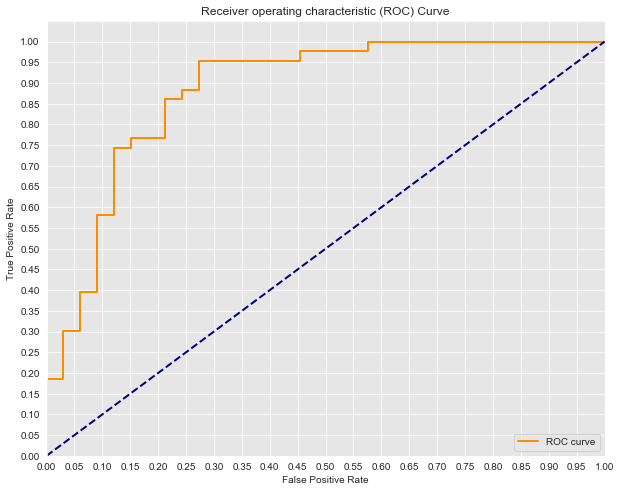

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Seaborns Beautiful Styling
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

the Receiver Operating Characteristic curve (ROC) graphs the False Positive Rate against the True Positive Rate. The overall accuracy of a classifier can thus be quantified by the AUC, the Area Under [this] Curve. Perfect classifiers would have an AUC score of 1.0 while and AUC of .5 is deemed trivial or worthless. 